### モジュールインポート

In [166]:
import pandas as pd#pandasのインポート
from sklearn.model_selection import train_test_split#データ分割用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
import numpy as np
import matplotlib.pyplot as plt

### スコア算出用関数

In [167]:
# スコア算出
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def get_eval_score(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_true,y_pred)
    
    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"R2SCORE = {r2score}")



### データの読み込み

In [168]:
df = pd.read_csv(r"./test_date.csv")
df.shape
df.head()

,suction_cup_diameter,plate_thickness,weight,vacuum_pressure,distorted
0,60,0.6,17.8,45,1
1,60,0.6,17.8,50,1
2,60,0.6,17.8,55,1
3,60,0.6,17.8,60,1
4,60,0.6,17.8,65,1


In [169]:
# 質的変数の変換
df = pd.get_dummies(df,drop_first = True)
df.head()

,suction_cup_diameter,plate_thickness,weight,vacuum_pressure,distorted
0,60,0.6,17.8,45,1
1,60,0.6,17.8,50,1
2,60,0.6,17.8,55,1
3,60,0.6,17.8,60,1
4,60,0.6,17.8,65,1


In [170]:
# テストデータとトレーニングデータの準備
train_data = df.drop("distorted", axis=1) #説明変数のデータ
y = df["distorted"] #目的変数のデータ
X = train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### ランダムフォレスト

In [171]:
# ランダムフォレストでモデル作成
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(max_depth=3,random_state=0).fit(X_train,y_train)
clf = RandomForestClassifier(random_state=1234).fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

score= 0.9893617021276596


In [172]:
# クロスバリデーションで検証
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf_cv = RandomForestClassifier(n_estimators=3,max_depth=5,random_state=0)
k_fold = KFold(n_splits=5,shuffle=True,random_state=0)
rf_scores = cross_val_score(estimator=rf_cv,X=X,y=y,cv=k_fold,scoring="r2")
print(f"各分割のスコア：{rf_scores}")
print(f"平均スコア：{np.mean(rf_scores)}")

各分割のスコア：[0.79456522 0.79411765 0.78397213 0.56028369 0.91205674]
平均スコア：0.7689990830835166


<BarContainer object of 4 artists>

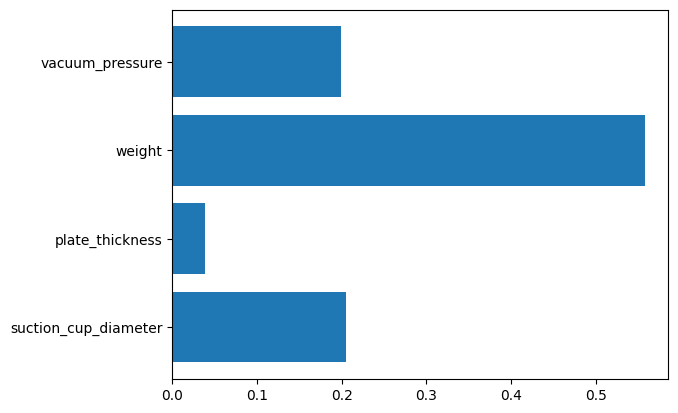

In [173]:
# 重要度の確認
rf_cls.feature_importances_
plt.barh(X.columns,rf_cls.feature_importances_)

### XgBoost

In [174]:
# XgBoostにてモデル作成
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=0)
eval_set = [(X_test,y_test)]
xgb_clf.fit(X_train,y_train,eval_set=eval_set,verbose=True)
# print("best_score")
# print(xgb_clf.best_score)
# print("best_iteration")
# print(xgb_clf.best_iteration)

k_fold = KFold(n_splits=5,shuffle=True,random_state=0)
xgb_scores = cross_val_score(xgb_clf,X,y,cv=k_fold,scoring="r2")
print(f"各分割のスコア：{xgb_scores}")
print(f"平均スコア：{np.mean(xgb_scores)}")

[0]	validation_0-logloss:0.40840
[1]	validation_0-logloss:0.31003
[2]	validation_0-logloss:0.24135
[3]	validation_0-logloss:0.19630
[4]	validation_0-logloss:0.15771
[5]	validation_0-logloss:0.13927
[6]	validation_0-logloss:0.11713
[7]	validation_0-logloss:0.10451
[8]	validation_0-logloss:0.08950
[9]	validation_0-logloss:0.07752


[10]	validation_0-logloss:0.07402
[11]	validation_0-logloss:0.06879
[12]	validation_0-logloss:0.06655
[13]	validation_0-logloss:0.06212
[14]	validation_0-logloss:0.05848
[15]	validation_0-logloss:0.05771
[16]	validation_0-logloss:0.05614
[17]	validation_0-logloss:0.05518
[18]	validation_0-logloss:0.05385
[19]	validation_0-logloss:0.05222
[20]	validation_0-logloss:0.04988
[21]	validation_0-logloss:0.05059
[22]	validation_0-logloss:0.04960
[23]	validation_0-logloss:0.04870
[24]	validation_0-logloss:0.04806
[25]	validation_0-logloss:0.04731
[26]	validation_0-logloss:0.04663
[27]	validation_0-logloss:0.04613
[28]	validation_0-logloss:0.04554
[29]	validation_0-logloss:0.04620
[30]	validation_0-logloss:0.04571
[31]	validation_0-logloss:0.04529
[32]	validation_0-logloss:0.04486
[33]	validation_0-logloss:0.04436
[34]	validation_0-logloss:0.04397
[35]	validation_0-logloss:0.04257
[36]	validation_0-logloss:0.04241
[37]	validation_0-logloss:0.04110
[38]	validation_0-logloss:0.04099
[39]	validatio

In [175]:
# XgBoostのハイパーパラメータをグリッドサーチでチューニング
xgb_clf_grid = XGBClassifier()
from sklearn.model_selection import GridSearchCV
params = {"booster": ["gbtree"],
          "n_estimators":[10,30,50,100],
          "max_depth":[2,3,4,5,6],
          "learning_rate":[0.1,0.25,0.5,0.75,1.0],
          "colsample_bytree":[0.1,0.25,0.5,0.75,1.0],
          #"radom_state":[0]
          }

k_fold = KFold(n_splits=5,shuffle=True,random_state=0)
grid = GridSearchCV(estimator=xgb_clf_grid,param_grid=params,cv=k_fold,scoring="r2")
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='r2')

In [176]:
# 最も評価が高い組み合わせとスコアの算出
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.75, 'learning_rate': 0.75, 'max_depth': 6, 'n_estimators': 10}
0.824205262564796


In [177]:
# グリッドサーチのベストパラメータでモデルを作成
from sklearn.metrics import accuracy_score

model_xgb_grid = grid.best_estimator_
y_test_pred = model_xgb_grid.predict(X_test)
score = accuracy_score(y_test,y_test_pred)

print("score:{0:.4f}".format(score))

score:1.0000


<BarContainer object of 4 artists>

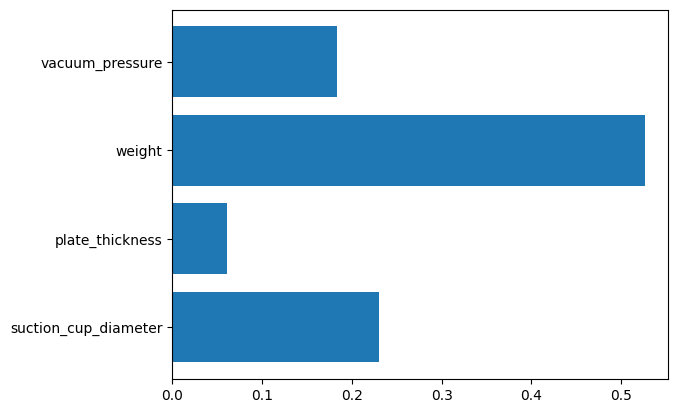

In [178]:
# 重要度の確認
xgb_clf.feature_importances_
plt.barh(X.columns,xgb_clf.feature_importances_)

### モデル保存

In [182]:
import pickle
pickle.dump(model_xgb_grid,open(f'model.pkl','wb'))